<a href="https://colab.research.google.com/github/Articuano/Visualize-with-Digraph/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
class Value:
  def __init__(self, data, _children=(), _op=""):
    self.data = data
    self.label = ""
    self._prev = set(_children)
    self._op = _op

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self,other):
    ans = Value(self.data + other.data, (self, other), "+")
    return ans
  
  def __mul__(self,other):
    ans = Value(self.data * other.data, (self, other), "*")
    return ans
  
  def __sub__(self,other):
    ans = Value(self.data - other.data, (self, other), "-")
    return ans
  
  def __floordiv__(self,other):
    ans = Value(self.data // other.data, (self, other), "//")
    return ans
  
  def __truediv__(self,other):
    ans = Value(self.data / other.data, (self, other), "/")
    return ans
  
  def __mod__(self,other):
    ans = Value(self.data % other.data, (self, other), "%")
    return ans
  
  def __pow__(self,other):
    ans = Value(self.data ** other.data, (self, other), "**")
    return ans

In [82]:
from graphviz import Digraph
def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
    for child in v._prev:
      edges.add((child, v))
      build(child)
  build(root)
  return (nodes,edges)

def draw_dot(root):
  dot = Digraph(format="svg", graph_attr={"rankdir":"LR"})
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    if n.label == "":
      dot.node(name = uid, label = "{ data %.4f}" % (n.data), shape='record')
    else:
      dot.node(name = uid, label = "{ %s | data %.4f}" % (n.label, n.data), shape='record')
    if n._op:
      dot.node(name = uid + n._op, label = n._op)
      dot.edge(uid + n._op, uid)
  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)
  return dot

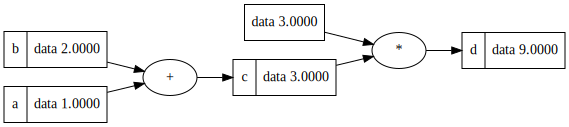

In [83]:
a = Value(1)
b = Value(2)
c = (a+b)
d = c * Value(3)
e = d ** Value(2)
a.label = "a"; b.label = "b"; c.label = "c"; d.label = "d"; e.label="e"
draw_dot(d)

Till how many terms do you want the fibbonacci series to go: 
5


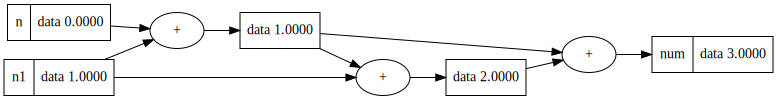

In [84]:
fibboNum = input("Till how many terms do you want the fibbonacci series to go: \n")
n = Value(0)
n1 = Value(1)
n.label ="n"
n1.label="n1"
for i in range(2,int(fibboNum)):
  num = n + n1
  n = n1
  n1 = num
num.label = "num"
draw_dot(num)